# Data Generation and Augmentation

## Table of Contents
1. Introduction
2. Examples
3. References and Further Reading

<a id='introduction'></a>
## 1. Introduction

Generative AI can be used for data generation and augmentation in several ways, particularly in creating realistic synthetic data based on specific situations:

1. Creating realistic synthetic datasets
2. Augmenting existing data with additional attributes
3. Generating data patterns based on given prompts
4. Filling in missing data points
5. Simulating various scenarios for testing and analysis
6. Creating diverse datasets: Gen AI can generate a wide range of data points that mimic real-world scenarios.
7. Augmenting existing datasets: It can add variations to existing data, increasing dataset size and diversity.
8. Generating rare or edge cases: AI can create data for uncommon scenarios that are hard to collect naturally.
9. Preserving privacy: Synthetic data can be used instead of sensitive real data for testing and development.
10. Balancing datasets: Gen AI can create additional samples for underrepresented classes in imbalanced datasets.
   
Using Gen AI for synthetic data creation offers several benefits:

- Overcoming data scarcity
- Protecting privacy by avoiding real user data
- Creating diverse datasets for robust model training
- Simulating rare events or edge cases
- Rapid prototyping and testing of data-driven systems
- Increases dataset size, improving model performance.
- Enhances dataset diversity, reducing bias.
- Saves time compared to manual data collection.
- Allows exploration of 'what-if' scenarios.

Key terminology:
- Synthetic Data: Artificially generated data that mimics real-world data
- Data Augmentation: Techniques to increase the amount and diversity of data
- Prompt: A text input that guides the AI in generating specific types of data
- Pattern: A repeating structure or trend in the data that the AI can learn and replicate

For data engineers, Gen AI-based synthetic data creation can be particularly helpful in:
- Testing data pipelines with diverse and large-scale datasets
- Developing and validating data models without risking real, sensitive data
- Creating representative datasets for machine learning model training
- Simulating various data scenarios for system stress testing

In [1]:
!pip install openai pandas scikit-learn matplotlib

In [ ]:
import os
import openai
import pandas as pd
import json
from openai import OpenAI
import numpy as np
from pprint import pprint


# Set up OpenAI API key
API_KEY = os.getenv('API_KEY')
client = OpenAI(api_key=API_KEY)

def clean(dict_variable):
    return next(iter(dict_variable.values()))

In [3]:
# test our API call
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user", "content": "tell me a slogan for an ice cream company. Return as a JSON object."},
    ],
    response_format={"type": "json_object"}
)

In [4]:
n = json.loads(completion.choices[0].message.content)

In [5]:
clean(n)

'Chill Out with Every Scoop!'

<a id='example1'></a>
## 2. Example 1: Generating Synthetic Data

In [6]:
prompt = "Generate synthetic sales data for an e-commerce platform. Include fields for date, customer_id (Customer ###), order total (in $USD). For certain orders, the order total should be negative. Create data for 10 customers. Output in JSON form."

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

customer_data = json.loads(response.choices[0].message.content)
print(json.dumps(customer_data, indent=2))

{
  "sales_data": [
    {
      "date": "2023-10-01",
      "customer_id": "Customer 01",
      "order_total": 25.75
    },
    {
      "date": "2023-10-02",
      "customer_id": "Customer 02",
      "order_total": 50.0
    },
    {
      "date": "2023-10-03",
      "customer_id": "Customer 03",
      "order_total": 15.25
    },
    {
      "date": "2023-10-04",
      "customer_id": "Customer 04",
      "order_total": -5.0
    },
    {
      "date": "2023-10-05",
      "customer_id": "Customer 01",
      "order_total": 60.75
    },
    {
      "date": "2023-10-06",
      "customer_id": "Customer 05",
      "order_total": 45.5
    },
    {
      "date": "2023-10-07",
      "customer_id": "Customer 06",
      "order_total": 100.0
    },
    {
      "date": "2023-10-08",
      "customer_id": "Customer 02",
      "order_total": 70.0
    },
    {
      "date": "2023-10-09",
      "customer_id": "Customer 03",
      "order_total": -20.0
    },
    {
      "date": "2023-10-10",
      "custome

In [8]:
# Convert to DataFrame
df_customers = pd.DataFrame(clean(customer_data))
print(df_customers)

          date  customer_id  order_total
0   2023-10-01  Customer 01        25.75
1   2023-10-02  Customer 02        50.00
2   2023-10-03  Customer 03        15.25
3   2023-10-04  Customer 04        -5.00
4   2023-10-05  Customer 01        60.75
5   2023-10-06  Customer 05        45.50
6   2023-10-07  Customer 06       100.00
7   2023-10-08  Customer 02        70.00
8   2023-10-09  Customer 03       -20.00
9   2023-10-10  Customer 07        30.00
10  2023-10-11  Customer 08        12.99
11  2023-10-12  Customer 09        88.50
12  2023-10-13  Customer 10       -15.00
13  2023-10-14  Customer 01        40.00
14  2023-10-15  Customer 03        20.00
15  2023-10-16  Customer 05        11.50
16  2023-10-17  Customer 06        75.00
17  2023-10-18  Customer 02        35.25
18  2023-10-19  Customer 04       -10.00
19  2023-10-20  Customer 10        20.50
20  2023-10-21  Customer 09        50.00
21  2023-10-22  Customer 07        55.25
22  2023-10-23  Customer 08        18.75
23  2023-10-24  

In [9]:
prompt = """Generate 5 synthetic product reviews for a smartphone. Include fields for review_id, rating (1-5), and review_text. Output in JSON form."""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

review_data = json.loads(response.choices[0].message.content)
print(json.dumps(review_data, indent=2))

{
  "reviews": [
    {
      "review_id": "1",
      "rating": 5,
      "review_text": "Absolutely love this smartphone! The camera quality is outstanding, and the battery lasts all day long. The design is sleek and modern. Highly recommend!"
    },
    {
      "review_id": "2",
      "rating": 4,
      "review_text": "Great performance and smooth user interface. The only downside is the lack of expandable storage. Otherwise, it's a fantastic device for the price."
    },
    {
      "review_id": "3",
      "rating": 2,
      "review_text": "I was really excited about this phone, but it has been disappointing. The battery drains quickly and the apps crash often. I wouldn\u2019t recommend it."
    },
    {
      "review_id": "4",
      "rating": 3,
      "review_text": "Average smartphone experience. It has good features, but nothing stands out. The screen could be brighter, and the audio quality isn't the best."
    },
    {
      "review_id": "5",
      "rating": 5,
      "review_text

In [10]:
# Convert to DataFrame
df_reviews = pd.DataFrame(clean(review_data))
print(df_reviews)

  review_id  rating                                        review_text
0         1       5  Absolutely love this smartphone! The camera qu...
1         2       4  Great performance and smooth user interface. T...
2         3       2  I was really excited about this phone, but it ...
3         4       3  Average smartphone experience. It has good fea...
4         5       5  This smartphone exceeded my expectations! Fast...


<a id='example2'></a>
## 2. Example 2: Augmenting Existing Data

In [11]:
# Assuming we have an existing dataset
existing_data = pd.DataFrame({
    'product': ['Laptop', 'Smartphone'],
    'price': [1200, 800],
    'category': ['Electronics', 'Electronics']
})
print("Existing Data:")
print(existing_data)

prompt = f"""Given this product data: {existing_data.to_dict('records')}, 
generate 3 additional products in the same format, maintaining similar patterns but with different values. Output in JSON form."""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

new_products = clean(json.loads(response.choices[0].message.content))
print("\nGenerated New Products:")
print(json.dumps(new_products, indent=2))

Existing Data:
      product  price     category
0      Laptop   1200  Electronics
1  Smartphone    800  Electronics

Generated New Products:
[
  {
    "product": "Tablet",
    "price": 600,
    "category": "Electronics"
  },
  {
    "product": "Smartwatch",
    "price": 250,
    "category": "Electronics"
  },
  {
    "product": "Bluetooth Headphones",
    "price": 150,
    "category": "Electronics"
  }
]


In [ ]:
print(pd.DataFrame(data=new_products))

In [12]:
# Original dataset
original_data = [
    {"id": 1, "age": 25, "income": 50000},
    {"id": 2, "age": 40, "income": 75000}
]

print("Original data:")
print(json.dumps(original_data, indent=2))

Original data:
[
  {
    "id": 1,
    "age": 25,
    "income": 50000
  },
  {
    "id": 2,
    "age": 40,
    "income": 75000
  }
]


In [13]:
prompt = f"Generate 3 new data points similar to these, maintaining realistic relationships between age and income. Output in JSON form: {json.dumps(original_data)}"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

new_data = json.loads(response.choices[0].message.content)

augmented_data = original_data + clean(new_data)

print("Augmented data:")
print(json.dumps(augmented_data, indent=2))

Augmented data:
[
  {
    "id": 1,
    "age": 25,
    "income": 50000
  },
  {
    "id": 2,
    "age": 40,
    "income": 75000
  },
  {
    "id": 3,
    "age": 30,
    "income": 60000
  },
  {
    "id": 4,
    "age": 50,
    "income": 90000
  },
  {
    "id": 5,
    "age": 35,
    "income": 70000
  }
]


In [14]:
pd.DataFrame(augmented_data).sort_values('age')

,id,age,income
0,1,25,50000
2,3,30,60000
4,5,35,70000
1,2,40,75000
3,4,50,90000


<a id='example3'></a>
## 2. Example 3: Creating Time Series Data

In [15]:
prompt = "Generate synthetic daily sales data for a coffee shop for over 4 weeks, for product. Include date and total_sales. Show a realistic pattern with weekend peaks. Output in JSON form."

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

sales_data = json.loads(response.choices[0].message.content)
print(json.dumps(sales_data, indent=2))

{
  "sales_data": [
    {
      "date": "2023-09-01",
      "total_sales": 320
    },
    {
      "date": "2023-09-02",
      "total_sales": 400
    },
    {
      "date": "2023-09-03",
      "total_sales": 450
    },
    {
      "date": "2023-09-04",
      "total_sales": 280
    },
    {
      "date": "2023-09-05",
      "total_sales": 300
    },
    {
      "date": "2023-09-06",
      "total_sales": 310
    },
    {
      "date": "2023-09-07",
      "total_sales": 330
    },
    {
      "date": "2023-09-08",
      "total_sales": 350
    },
    {
      "date": "2023-09-09",
      "total_sales": 420
    },
    {
      "date": "2023-09-10",
      "total_sales": 460
    },
    {
      "date": "2023-09-11",
      "total_sales": 290
    },
    {
      "date": "2023-09-12",
      "total_sales": 310
    },
    {
      "date": "2023-09-13",
      "total_sales": 320
    },
    {
      "date": "2023-09-14",
      "total_sales": 345
    },
    {
      "date": "2023-09-15",
      "total_sales": 3

In [16]:
# Convert to DataFrame
df_sales = pd.DataFrame(clean(sales_data))
df_sales['date'] = pd.to_datetime(df_sales['date'])
print(df_sales)

         date  total_sales
0  2023-09-01          320
1  2023-09-02          400
2  2023-09-03          450
3  2023-09-04          280
4  2023-09-05          300
5  2023-09-06          310
6  2023-09-07          330
7  2023-09-08          350
8  2023-09-09          420
9  2023-09-10          460
10 2023-09-11          290
11 2023-09-12          310
12 2023-09-13          320
13 2023-09-14          345
14 2023-09-15          350
15 2023-09-16          500
16 2023-09-17          480
17 2023-09-18          300
18 2023-09-19          330
19 2023-09-20          310
20 2023-09-21          340
21 2023-09-22          360
22 2023-09-23          520
23 2023-09-24          500
24 2023-09-25          320
25 2023-09-26          340
26 2023-09-27          355
27 2023-09-28          370
28 2023-09-29          390
29 2023-09-30          550
30 2023-10-01          530
31 2023-10-02          310
32 2023-10-03          325
33 2023-10-04          340
34 2023-10-05          360
35 2023-10-06          380
3

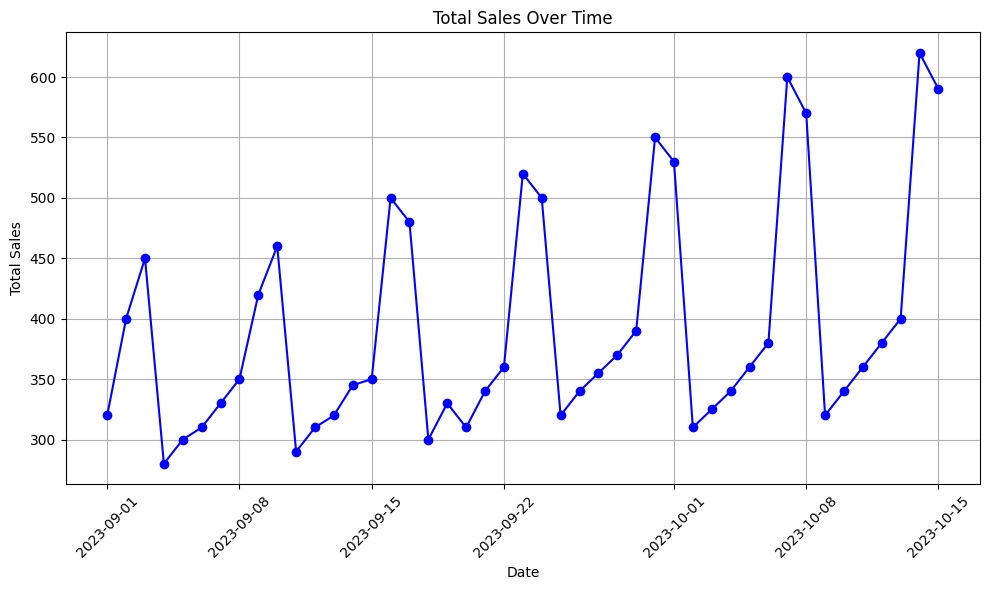

In [17]:
# visualize it
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_sales['date'], df_sales['total_sales'], marker='o', linestyle='-', color='b')

plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<a id='3'></a>
## 2. Example 4: Generating Edge Cases for a Weather Dataset

In [18]:
# Create a standard weather dataset
weather_data = pd.DataFrame({
    'date': pd.date_range(start='2023-01-01', periods=100),
    'temperature': np.random.uniform(0, 30, 100),
    'precipitation': np.random.uniform(0, 50, 100),
    'wind_speed': np.random.uniform(0, 20, 100)
})

print(weather_data.head())
print(f"\nTemperature range: {weather_data['temperature'].min():.2f} to {weather_data['temperature'].max():.2f}")
print(f"Precipitation range: {weather_data['precipitation'].min():.2f} to {weather_data['precipitation'].max():.2f}")
print(f"Wind speed range: {weather_data['wind_speed'].min():.2f} to {weather_data['wind_speed'].max():.2f}")

        date  temperature  precipitation  wind_speed
0 2023-01-01    18.198929      44.523067   18.887364
1 2023-01-02     5.470685       4.583327   14.895490
2 2023-01-03    16.035481       5.414170   16.278490
3 2023-01-04    29.284544      34.734614   19.314840
4 2023-01-05     4.931249      27.521319   14.511616

Temperature range: 0.08 to 29.91
Precipitation range: 0.39 to 49.96
Wind speed range: 0.01 to 19.88


In [22]:
# Use Gen AI to generate edge cases for weather data
prompt = "Generate 5 edge cases for a weather dataset with temperature (°C), precipitation (mm), and wind speed (m/s). Include extreme but plausible values. Output in JSON form"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

edge_cases = json.loads(response.choices[0].message.content)
pprint(edge_cases)

{'edge_cases': [{'description': 'Extreme cold temperature in a polar region '
                                'with no precipitation.',
                 'precipitation': 0,
                 'temperature': -50,
                 'wind_speed': 5},
                {'description': 'Extremely high temperature during an '
                                'unprecedented heatwave alongside heavy '
                                'rainfall.',
                 'precipitation': 300,
                 'temperature': 60,
                 'wind_speed': 20},
                {'description': 'Severe drought conditions with extremely high '
                                'temperatures and strong winds, increasing '
                                'wildfire risk.',
                 'precipitation': 0,
                 'temperature': 45,
                 'wind_speed': 35},
                {'description': 'Unusual weather event with a tropical storm '
                                'causing extreme rainfall

In [23]:
# Add edge cases to the weather dataset
for case in clean(edge_cases):
    new_row = {
        'date': pd.Timestamp.now(),
        'temperature': case['temperature'],
        'precipitation': case['precipitation'],
        'wind_speed': case['wind_speed']
    }
    new_row_df = pd.DataFrame([new_row])
    weather_data = pd.concat([weather_data, new_row_df], ignore_index=True)

print(weather_data.tail())
print(f"\nUpdated temperature range: {weather_data['temperature'].min():.2f} to {weather_data['temperature'].max():.2f}")
print(f"Updated precipitation range: {weather_data['precipitation'].min():.2f} to {weather_data['precipitation'].max():.2f}")
print(f"Updated wind speed range: {weather_data['wind_speed'].min():.2f} to {weather_data['wind_speed'].max():.2f}")

                          date  temperature  precipitation  wind_speed
105 2025-07-27 16:55:09.763210        -50.0            0.0         5.0
106 2025-07-27 16:55:09.764215         60.0          300.0        20.0
107 2025-07-27 16:55:09.765215         45.0            0.0        35.0
108 2025-07-27 16:55:09.766417         25.0          500.0        15.0
109 2025-07-27 16:55:09.768482        -10.0          100.0        10.0

Updated temperature range: -50.00 to 60.00
Updated precipitation range: 0.00 to 500.00
Updated wind speed range: 0.01 to 35.00


## 2. Example 5: Creating a Sample DataFrame with PII

In [24]:
data = {
    'Name': ['John Doe', 'Jane Smith', 'Bob Johnson'],
    'Email': ['john@example.com', 'jane@example.com', 'bob@example.com'],
    'Phone': ['123-456-7890', '234-567-8901', '345-678-9012'],
    'Age': [30, 25, 45],
    'Salary': [50000, 60000, 75000]
}

df = pd.DataFrame(data)
print(df)

          Name             Email         Phone  Age  Salary
0     John Doe  john@example.com  123-456-7890   30   50000
1   Jane Smith  jane@example.com  234-567-8901   25   60000
2  Bob Johnson   bob@example.com  345-678-9012   45   75000


In [25]:
prompt = f"""Mask the following PII data. Keep the Age and Salary as is. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

masked_data = json.loads(response.choices[0].message.content)
masked_df = pd.DataFrame(clean(masked_data))
print(masked_df)

         Name             Email       Phone  Age  Salary
0   **** ***,  ****@example.com  **********   30   50000
1  **** *****  ****@example.com  **********   25   60000
2  *** ******  ****@example.com  **********   45   75000


In [26]:
prompt = f"""Generate synthetic data similar to the following, but with different PII. Keep the Age and Salary distributions similar. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"}
)

synthetic_data = json.loads(response.choices[0].message.content)
synthetic_df = pd.DataFrame(clean(synthetic_data))
print(synthetic_df)

            Name                      Email         Phone  Age  Salary
0    Alice Brown    alice.brown@example.com  456-789-0123   29   52000
1  Michael White  michael.white@example.com  567-890-1234   34   58000
2    Emily Davis    emily.davis@example.com  678-901-2345   42   72000


In [27]:
pii_text = 'My name is Henry and I live in Toronto and I was having trouble accessing my bank account (account ID: 125526). \
    Could you please help me?'

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": "Remove any PII from the following text, replace it with *: {}".format(pii_text)}]
)

print(response.choices[0].message.content)

My name is * and I live in * and I was having trouble accessing my bank account (account ID: *****). Could you please help me?


## 2. Example 6: Generating Synthetic Samples for an Imbalanced Dataset

In [28]:
import pandas as pd
import numpy as np

# Create an unbalanced dataset of product reviews
positive_reviews = [
    "This product is amazing! I love it!",
    "Great quality and fast shipping.",
    "Exceeded my expectations. Highly recommended!",
    "Best purchase I've made in years.",
    "Fantastic product, will buy again."
]

negative_reviews = [
    "Disappointed with the quality."
]

reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

df = pd.DataFrame({'review': reviews, 'sentiment': labels})
print(df)
print(f"\nClass distribution:\n{df['sentiment'].value_counts()}")

                                          review  sentiment
0            This product is amazing! I love it!          1
1               Great quality and fast shipping.          1
2  Exceeded my expectations. Highly recommended!          1
3              Best purchase I've made in years.          1
4             Fantastic product, will buy again.          1
5                 Disappointed with the quality.          0

Class distribution:
sentiment
1    5
0    1
Name: count, dtype: int64


In [29]:
# Function to generate negative reviews
def generate_negative_review():
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates product reviews."},
            {"role": "user", "content": "Generate a negative product review similar to these negative reviews: {}. Output in JSON form.".format(negative_reviews)}
        ],
        response_format={"type": "json_object"}
    )
    return clean(json.loads(response.choices[0].message.content))

# Generate additional negative reviews
num_to_generate = len(positive_reviews) - len(negative_reviews)
new_negative_reviews = [generate_negative_review() for _ in range(num_to_generate)]

# Add new negative reviews to the dataset
new_data = pd.DataFrame({'review': new_negative_reviews, 'sentiment': [0] * len(new_negative_reviews)})
df_balanced = pd.concat([df, new_data], ignore_index=True)

print(df_balanced)
print(f"\nNew class distribution:\n{df_balanced['sentiment'].value_counts()}")

                                              review  sentiment
0                This product is amazing! I love it!          1
1                   Great quality and fast shipping.          1
2      Exceeded my expectations. Highly recommended!          1
3                  Best purchase I've made in years.          1
4                 Fantastic product, will buy again.          1
5                     Disappointed with the quality.          0
6  I expected much better from this product. It f...          0
7  The product did not meet my expectations at al...          0
8  The durability of this product is really lacki...          0
9  The product did not meet my expectations at al...          0

New class distribution:
sentiment
1    5
0    5
Name: count, dtype: int64


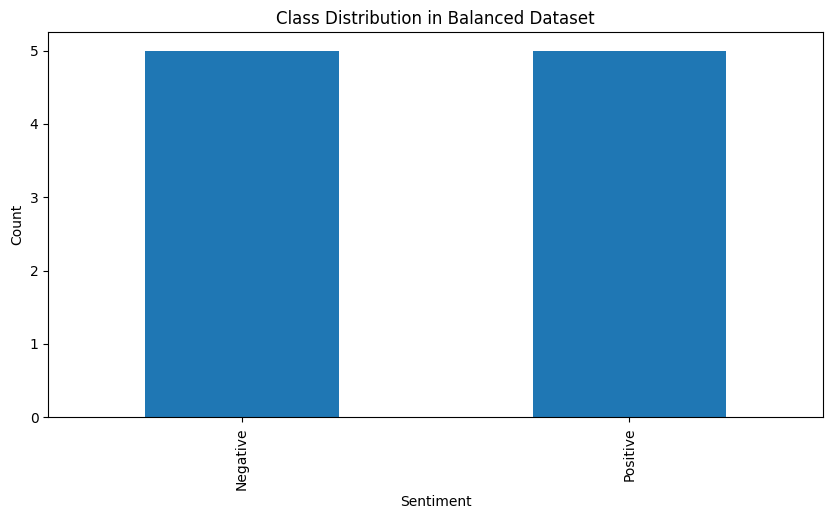

Sample of generated negative reviews:
5                       Disappointed with the quality.
6    I expected much better from this product. It f...
7    The product did not meet my expectations at al...
8    The durability of this product is really lacki...
9    The product did not meet my expectations at al...
Name: review, dtype: object


In [30]:
import matplotlib.pyplot as plt

# Visualize class distribution
plt.figure(figsize=(10, 5))
df_balanced['sentiment'].value_counts().plot(kind='bar')
plt.title('Class Distribution in Balanced Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

# Display some generated negative reviews
print("Sample of generated negative reviews:")
print(df_balanced[df_balanced['sentiment'] == 0]['review'].head())

<a id='references'></a>
## 3. References and Further Reading

1. OpenAI API Documentation: https://platform.openai.com/docs/
2. "Synthetic Data for Deep Learning" by Sergey I. Nikolenko
3. "The Synthetic Data Vault" by Neha Patki et al.
4. "Data Augmentation in Time Series Domain" by Eamonn Keogh and Jessica Lin
5. "Generative AI: A Creative New World" by McKinsey & Company